### Questions to answer:
Are the delays getting worse for the LYON PART DIEU to PARIS LYON segment?
To answer this question we use the columns Period, Number of late trains at departure, Average delay of late departing trains (min)

In [180]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Assess data

In [181]:
# Load data and show first 5 rows (all columns)
df = pd.read_csv('Regularities_by_liaisons_Trains_France.csv')
pd.set_option("display.max_columns", None)
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


## Filter data

In [182]:
# Filter columns needed
df = df[['Period', 'Departure station', 'Arrival station', 'Number of late trains at departure', 'Average delay of all departing trains (min)']]

In [183]:
# Filter the right segment
df = df[(df['Departure station'] == 'LYON PART DIEU') & (df['Arrival station']== 'PARIS LYON')]

In [184]:
# Calculate the total delay minutes on the segment
df['Delay minutes'] = df['Number of late trains at departure'] * df['Average delay of all departing trains (min)']

In [191]:
# Sort the values based on their date
df = df.sort_values('Period')

## Modelling

In [194]:
# Model
arima_model = sm.tsa.ARIMA(df['Delay minutes'], order=(1,0,0))
model = arima_model.fit()
print(model.summary())
predictions = model.predict()



c:\Users\marieke.beerepoo_nsp\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marieke.beerepoo_nsp\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marieke.beerepoo_nsp\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Delay minutes   No. Observations:                   66
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -478.808
Date:                Tue, 27 Jun 2023   AIC                            963.615
Time:                        14:48:25   BIC                            970.184
Sample:                             0   HQIC                           966.211
                                 - 66                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        627.1749    258.050      2.430      0.015     121.407    1132.943
ar.L1          0.7576      0.099      7.681      0.000       0.564       0.951
sigma2      1.157e+05   2.02e+04      5.724      0.000    7.61e+04    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                22.61
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               9.00   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Period to a datetime
df['Period'] = pd.to_datetime(df['Period'])

## Visualize

Text(0, 0.5, 'Minutes late')

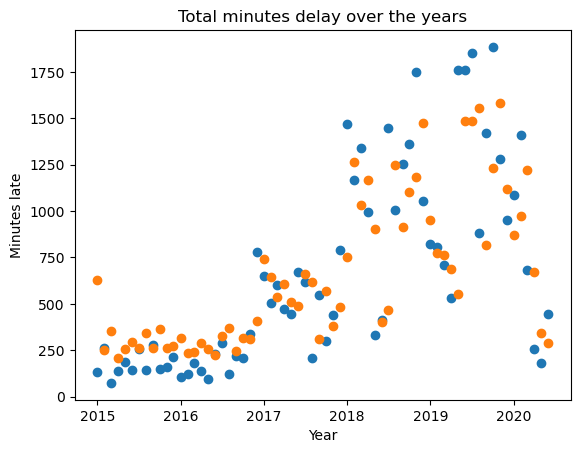

In [195]:
# Plot the data
plt.plot(df['Period'], df['Delay minutes'], marker='o', linestyle='')
plt.plot(df['Period'], predictions, marker='o', linestyle='')
plt.title('Total minutes delay over the years')
plt.xlabel('Year')
plt.ylabel('Minutes late')

## Conclusion
coefficient is positive (0.758) which means the delay is getting worse over the years.